# **Titanic Dataset 분석**

## **1. 필요한 라이브러리 Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Github에서 제공하는 타이타닉 데이터셋 불러오기**


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

## **3. 타이타닉 데이터셋 분석하기**
- 전체 데이터는 891개 행과 12개열로 구성
- 문제의 정의: 생존여부(Survived)는 범주형 변수(명목형)이며 1(생존)과 0(사망)의 값을 가지는 이진분류 문제
- 분석 목적: 입력 조건의 승객에 대한 생존여부를 맞추는(예측하는) 것

- 타이타닉 데이터셋의 컬럼 구조와 의미
  - PassengerID : 승객번호
  - Survived : 생존여부(1:생존, 0:사망)
  - Pclass : 등급별 분류(1: 1등실, 2: 2등실, 3: 3등실)
  - Name : 이름
  - Sex : 성별(male, female)
  - Age : 나이
  - Sibsp : 동승 가족 수 (형제/배우자)
  - Parch : 동승 가족 수 (부모/자녀)
  - Ticket : 티켓번호
  - Fare : 요금(운임)
  - Cabin : 선실번호
  - Embarked : 탑승지(C: Cherbourg, Q: Queenstown, S: Southampton)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3-1. 변수 타입 변환
  - Survived, Pclass는 숫자형이지만 숫자로서의 의미가 아니라 범주(카테고리)로서의 의미이므로 타입을 변환함
    - 통계값 계산 시 방해되므로..

In [5]:
df["Survived"] = df["Survived"].astype(str)
df["Pclass"] = df["Pclass"].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


### 3-2. head() 함수를 이용한 데이터 탐색
- 데이터의 앞에서 10개 보기

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 3-3. info() 함수를 이용한 데이터 탐색
  - 결측치 확인하기
    - Age, Fare, Embarked의 값은 전체 데이터의 개수인 891보다 적으므로 결측치가 있음을 확인할 수 있음

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


### 3-4. describe() 함수를 이용한 탐색
  - EDA 수행 시 가장 많이 사용하는 함수
  - 데이터셋의 수치형 변수에 대하여 기초통계량을 보여줌
  - include='all' 옵션을 사용하면 모든 변수에 대한 통계와 분포를 보여줌
  - 범주형 변수의 경우에는 unique, top, freq 값을 보여줌
    - unique: 변수에 저장된 범주(값)의 수
    - top: 가장 많이 출현하는 값
    - freq: 가장 많이 출현하는 값의 개수

In [11]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,0,3,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,549,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3-5. head(), info(), descrive()를 이용한 탐색 결과
- PassengerID : 승객번호 --> 분석 의미 없음
- Survived : 분석의 목표 변수. 생존여부(1:생존, 0:사망)
- Pclass : 등급별 분류(1: 1등실, 2: 2등실, 3: 3등실) --> 3등급 승객이 가장 많음(491)
- Name : 이름 --> 비슷한 이름을 가진 사람이 있음 --> 혼자 탄 승객도 있지만 가족단위로 탑승한 승객도 있음
- Sex : 성별(male, female) --> 남성(577), 여성(314) --> 남성 승객이 여성승객보다 많음(약 2배)
- Age : 나이 --> 0.42 ~ 80세까지 있음 --> 아기도 승객에 포함되어 있음 --> 177개의 결측치 존재(891-714=177)
- Sibsp : 동승 가족 수 (형제/배우자) --> 0 ~ 8, 3분위수가 1 이므로 부부 혹은 형제와 함께 탑승했음을 알 수 있음(1을 넘어서는 값은 가족단위)
- Parch : 동승 가족 수 (부모/자녀) --> 0 ~ 9, 3분위수가 0 이므로 부모, 자녀들과 함께 탑승한 승객은 거의 없음
- Ticket : 티켓번호 --> 분석 의미 없음
- Fare : 요금(운임) --> 0 ~ 512, 3qnsdnltnrk 31.00, 최댓값 512 --> 이상치로 추정
- Cabin : 선실번호 --> 배의 구역을 나타냄. 결측치가 687개(891-204)
- Embarked : 탑승지(C: Cherbourg, Q: Queenstown, S: Southampton) --> 총 3군데에서 탑승함. S가 가장 많음. 2개의 결측치가 있음

### 3-6. 기초 데이터 분석: Pclass(등급) 변수 분석

In [12]:
grouped = df.groupby("Pclass")
grouped.size()

Pclass
1    216
2    184
3    491
dtype: int64

### 3-7. 기초 데이터 분석: Fare(요금) 변수 분석
- 요금별 생존율 차이가 있는지 파악하기 위해 요금과 생존여부에 따른 데이터의 분석 및 시각화를 수행함
- 요금이 높은 승객이 생존자가 더 많으나 큰 차이는 없음을 알 수 있음
- 요금에 이상치가 존재함을 확인 가능

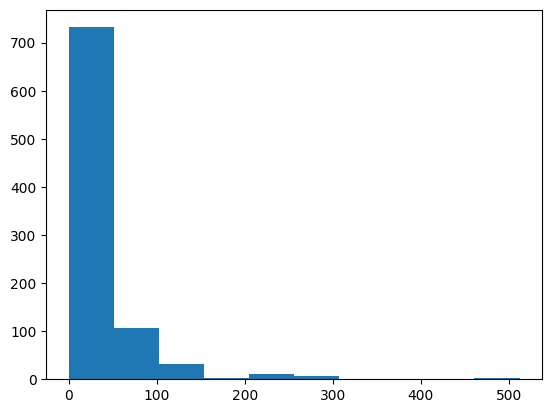

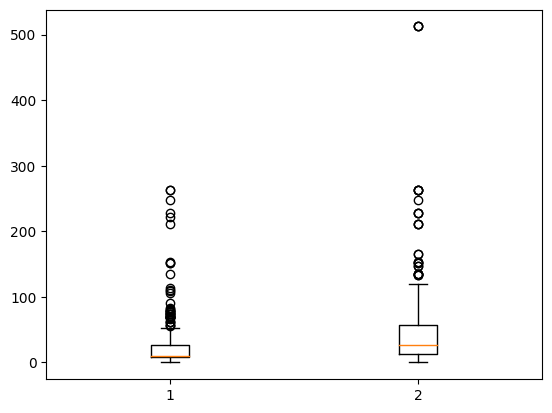

In [14]:
plt.hist(df["Fare"])
plt.show()

data_0 = df[df["Survived"]=="0"]["Fare"]
data_1 = df[df["Survived"]=="1"]["Fare"]

fig, ax = plt.subplots()
ax.boxplot([data_0, data_1])
plt.show()

### 3-8. 기초 데이터 분석: Sex(성별) 변수 분석
- 남녀간 생존율의 차이가 있는지 파악하기 위해 성별에 따른 데이터의 분석 및 시각화를 수행함
- 남성이 여성보다 훨씬 많은 반면, 생존율은 여성이 높음을 확인할 수 있음

In [16]:
# 빈도 수 계산
grouped = df.groupby("Sex")
print(grouped.size())

data_0 = df[df["Sex"]=="female"]["Survived"]
grouped = pd.DataFrame(data_0).groupby("Survived")
print(grouped.size())

data_1 = df[df["Sex"]=="male"]["Survived"]
grouped = pd.DataFrame(data_1).groupby("Survived")
print(grouped.size())

Sex
female    314
male      577
dtype: int64
Survived
0     81
1    233
dtype: int64
Survived
0    468
1    109
dtype: int64
